<a href="https://colab.research.google.com/github/crazydigger/loto/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%D1%8B_%D0%BE_%D0%B1%D0%BB%D0%B8%D0%B7%D0%BE%D1%81%D1%82%D0%B8_%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D1%82%D0%B2%D0%B5%D1%82%D0%B0_%D0%B2_doc2vec_(transformers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
path_archive = '/content/drive/MyDrive/СтажировкаУИИ/'
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def readfile(filename, n_lines = 5000, replace_line = '.\n'):
  with open(filename) as f:
    txt = f.readlines()
  txt_prep = []
  for t in txt[:n_lines]:
    t = t.lower()
    for x in replace_line:
      t = t.replace(x, '')
    txt_prep.append(t)
  return txt_prep

In [ ]:
txt_orig_tr5000 = readfile(path_archive + 'train_captions_tr5000.txt', n_lines=25000)
txt_pred_tr5000 = readfile(path_archive + 'predict_captions_tr5000.txt', n_lines=25000)

txt_orig_tr5000s = readfile(path_archive + 'train_captions_tr5000s.txt', n_lines=25000)
txt_pred_tr5000s = readfile(path_archive + 'predict_captions_tr5000s.txt', n_lines=25000)


In [ ]:
txt_orig_tr5000[0], len(txt_orig_tr5000)

('a black honda motorcycle parked in front of a garage', 25000)

In [ ]:
images = readfile(path_archive + 'images.txt', n_lines=5000, replace_line='\n')

In [ ]:
images[0]

'/content/val2017/000000179765.jpg'

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting:

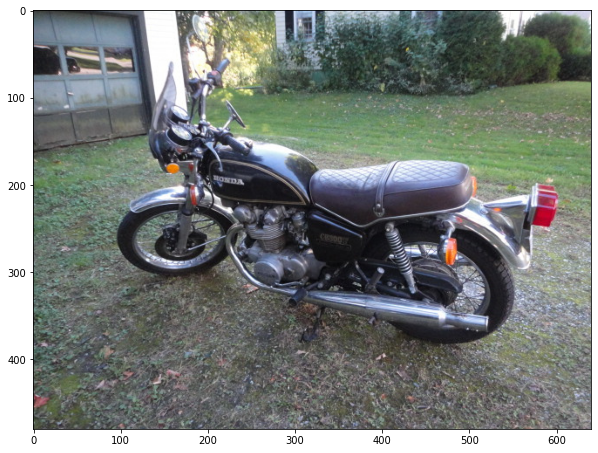

In [ ]:
img = Image.open(images[0])
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


# universal-sentence-encoder-multilingual-large

In [ ]:
!pip install tensorflow_text

     |████████████████████████████████| 3.4MB 3.6MB/s 


In [ ]:
import tensorflow_hub as hub
import numpy as np
import tensorflow_text

# Some texts of different lengths.
#english_sentences = ['a black honda motorcycle parked in front of a garage']
#italian_sentences = ["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."]
#japanese_sentences = ["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"]

#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")


# Compute embeddings.
#en_result = embed(english_sentences)
#it_result = embed(italian_sentences)
#ja_result = embed(japanese_sentences)

# Compute similarity matrix. Higher score indicates greater similarity.
#similarity_matrix_it = np.inner(en_result, it_result)
#similarity_matrix_ja = np.inner(en_result, ja_result)

In [ ]:
#download the model to local so it can be used again and again
!mkdir -p ./universal_encoder/module/module_useT
# Download the module, and uncompress it to the destination folder. 
!curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/5?tf-hub-format=compressed" | tar -zxvC ./universal_encoder/module/module_useT

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  523M    0  106k    0     0   183k      0  0:48:42 --:--:--  0:48:42  183k./
./assets/
./variables/
./variables/variables.index
./variables/variables.data-00000-of-00001
 90  523M   90  476M    0     0  38.1M      0  0:00:13  0:00:12  0:00:01 35.0M./saved_model.pb
100  523M  100  523M    0     0  39.7M      0  0:00:13  0:00:13 --:--:-- 45.6M


In [ ]:
embed = hub.load("./universal_encoder/module/module_useT")

In [ ]:
english_sentences1 = ['a green honda motorcycle parked in front of a garage', '<MISSED LINE>']
english_sentences2 = ['a black honda motorcycle parked in front of a garage', 'a car parked in front of a garage']

en_result1 = embed(english_sentences1)
en_result2 = embed(english_sentences2)
np.inner(en_result1, en_result2).max()

0.8602368

In [ ]:
similarity_tr = []
for i in range(5000):
  t_true = txt_orig_tr5000[i*5:i*5+5]
  for x in range(5):
    if t_true[x] == '': t_true[x] = '<MISSED LINE>' 

  em_result_true = embed(t_true)
  em_result_pred = embed(txt_pred_tr5000[i*5:i*5+5])
  similarity_tr.append(np.inner(em_result_true, em_result_pred).max())

similarity_tr = np.array(similarity_tr)


In [ ]:
similarity_trs = []
for i in range(5000):
  t_true = txt_orig_tr5000s[i*5:i*5+5]
  for x in range(5):
    if t_true[x] == '': t_true[x] = '<MISSED LINE>' 

  em_result_true = embed(t_true)
  em_result_pred = embed(txt_pred_tr5000s[i*5:i*5+5])
  similarity_trs.append(np.inner(em_result_true, em_result_pred).max())

similarity_trs = np.array(similarity_trs)


In [ ]:
similarity_tr.shape

(5000, 5, 5)

In [ ]:
# initial values for 3000 imgs
mean_segs = [0.40069357, 0.39407083, 0.38785425]
mean_imgs = [0.38980493, 0.39200088, 0.3847093]
mean_segs_conv20 = [0.39970487] # 3000 images
mean_segs_conv40 = [0.3990375]  # 3000 images

In [ ]:
mean_tr = []
for matrix in similarity_tr:
  mean_tr.append(matrix.max())

mean_tr = np.array(mean_tr).mean()
mean_tr

0.29033068

In [ ]:
mean_trs = []
for matrix in similarity_trs:
  mean_trs.append(matrix.max())

mean_trs = np.array(mean_trs).mean()
mean_trs

0.3123749

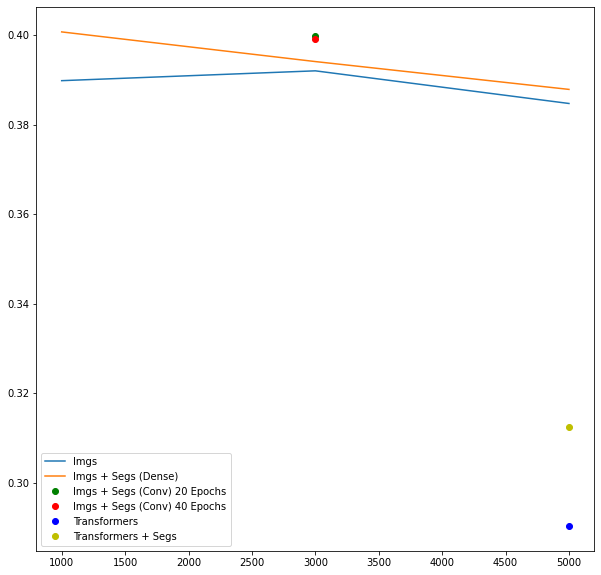

In [ ]:
from matplotlib import pyplot as plt

x = [1000, 3000, 5000]

plt.figure(figsize=(10,10))
plt.plot(x, mean_imgs, label='Imgs')
plt.plot(x, mean_segs, label='Imgs + Segs (Dense)')
plt.plot([3000], [mean_segs_conv20], 'go', label = 'Imgs + Segs (Conv) 20 Epochs')
plt.plot([3000], [mean_segs_conv40], 'ro', label = 'Imgs + Segs (Conv) 40 Epochs')
plt.plot([5000], [mean_tr], 'bo', label = 'Transformers')
plt.plot([5000], [mean_trs], 'yo', label = 'Transformers + Segs')

plt.legend()

plt.show()

